# GRIP @ THE SPARKS FOUNDATION

## TASK 1 : PREDICTION USING SUPERVISED ML

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading dataset

In [28]:
#url = "http://bit.ly/w-data"
#Dataset = pd.read_csv(url)
Dataset = pd.read_csv('dataset.csv')
print("Dataset is successfully loaded")
#Dataset

Dataset is successfully loaded


In [3]:
#first 5 records
Dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#last 5 records
Dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#percentiles,mean,std,max,count of the given dataset
Dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#full summary of the dataframe .
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Visualizing the dataset

### Scatter Plot

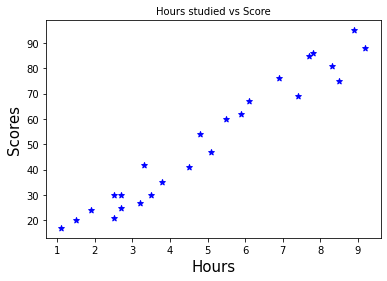

In [7]:
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(Dataset.Hours,Dataset.Scores,color='blue',marker='*')
plt.show()

#### This "SCATTER PLOT" indicates positive linear relationship between the study hours and scoring in exam

In [8]:
X = Dataset.iloc[:,:-1].values
Y = Dataset.iloc[:,1].values

In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting the dataset into train and test data

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 6,test_size=0.2)

In [12]:
## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


### Training the model

In [13]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

#### Fitting the training data

In [14]:
clf.fit(X_train,Y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


In [15]:
print("Intercept = ",clf.intercept_,"\nCoef =",clf.coef_)

Intercept =  1.3923258559622411 
Coef = [10.05312869]


#### Plotting the regression line

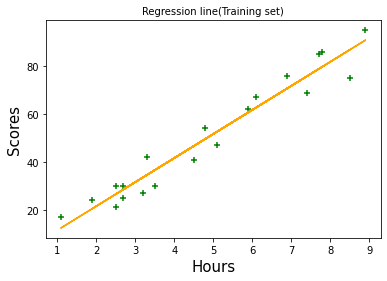

In [16]:
line = clf.intercept_ + clf.coef_*X_train
plt.scatter(X_train,Y_train,color='green',marker='+')
plt.plot(X_train,line,color='orange')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Training set)",fontsize=10)
plt.show()

## Testing the model

In [17]:
Y_pred = clf.predict(X_test)##predicting the Scores for test data
print(Y_pred)

[39.59421488 56.68453365 16.47201889 93.8811098  84.83329398]


In [18]:
Y_test

array([35, 60, 20, 88, 81], dtype=int64)

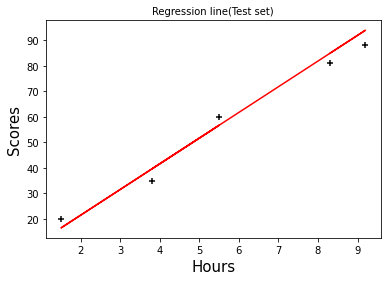

In [19]:
#plotting line on test data
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

#### Comparing Actual vs Predicted Scores

In [20]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,35,39.594215
1,60,56.684534
2,20,16.472019
3,88,93.881110
4,81,84.833294


### Accuracy Of The Model

In [21]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9723939704109645

In [22]:
print("Accuracy of the model : ", 0.9723939704109645)

Accuracy of the model :  0.9723939704109645


### Calculating The Error

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  18.765474673442764
Root Mean Squared Error =  4.331913511768531
Mean Absolute Error     =  4.331913511768531


### Prediction for given value

In [25]:
Prediction_score = clf.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [94.38376623]


## Conclusion

### From the above result we can say that if studied for 9.25 hours then a student will score 94.38 MARKS